# Bank Notes Authentication using Random Forest ML Model


### Step 1 : Importing the data from Bank Authentication Data Set, and naming the column as per the sequence of the attribute information .

 Importing Necessary Libraries for use in Notebook.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

Opening and Reading the txt file & converting it in DataFrame , with proper naming of columns . Also providing a peek of the DataFrame Created .

In [2]:
file = open('data_banknote_authentication.txt', 'r')
lines = file.readlines()

file.close()
tmp_df = []

for line in lines:
    tmp_list = line.strip().split(',')
    tmp_df.append(tmp_list)
    
dataframe = pd.DataFrame(tmp_df, columns=['Variance','Skewness','Curtosis','ImageEntropy','Class'])

columnX = ['Variance','Skewness','Curtosis','ImageEntropy']
dataframe[columnX] = dataframe[columnX].astype(float)
dataframe['Class'] = dataframe['Class'].astype(int)

dataframe.head()

,Variance,Skewness,Curtosis,ImageEntropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Step 2 : Consider all columns as independent variables and assign to variable X except the last column . Consider the last column as the dependent variable and assign to variable y. Remove columns which don’t help the problem statement.

Segregating DataFrame into X DataFrame and Y DataFrame .

In [3]:
X = dataframe.iloc[:,0:4]
Y = dataframe.iloc[:,4]

### Step 3 : Compute some basic statistical details like percentile, mean, standard deviation of dataset

In [4]:
dataframe.describe()

,Variance,Skewness,Curtosis,ImageEntropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


### Step 4 : Create a Countplot of the Classes

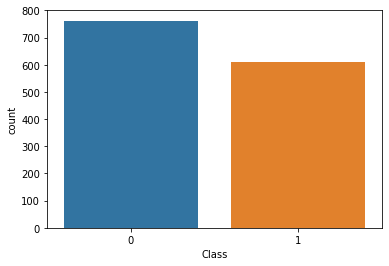

In [5]:
sns.countplot(x ='Class', data = dataframe)
plt.show() 

### Step 5 : Performing Feature Scaling on Independent variables

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

### Step 6 : Splitting the data into train and test dataset

Splitting the DataSet into 75% Training DataSet and 25% Testing DataSet

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

### Step 7 : Using sklearn library to train on training dataset on using Random Forest ML Model and predict on test dataset

In [8]:
from sklearn.ensemble import RandomForestClassifier

RFmodel = RandomForestClassifier(max_depth=2, random_state=0)
RFmodel.fit(X_train, Y_train)

Y_Pred = RFmodel.predict(X_test)

### Step 8 : Computing accuracy and confusion matrix.

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(Y_test, Y_Pred)

0.9212827988338192

The accuracy seems to be more than 90% , which means that it performs pretty good in this scenario . 

Creating confusion matrix , to get a more detailed view on the prediction 

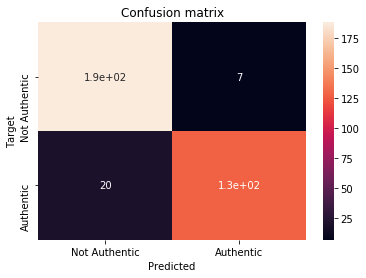

In [10]:
ConfMtrx = confusion_matrix(Y_test, Y_Pred)
sns.heatmap(ConfMtrx, annot=True, xticklabels=['Not Authentic','Authentic'], 
            yticklabels=['Not Authentic','Authentic'])
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.title('Confusion matrix')
plt.show()